In [1]:
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import LabelEncoder
import pandas as pd
import trino
import sys, os, time, datetime
from datetime import date
import argparse, platform, csv
from requests.auth import HTTPBasicAuth
import requests.packages.urllib3 as urllib3
from trino.dbapi import connect
urllib3.disable_warnings()
import matplotlib.pyplot as plt
#from statsmodels.tsa.stattools import adfuller
#from arch.unitroot import bds
import trino
import pandas as pd
from datetime import date
import time


In [2]:


TRINO_LARGE_CONN=trino.dbapi.connect(
    host='trino-nce.corp.chartercom.com',
    port=443,
    user='P3185033',
    catalog='minio_prod',
    schema='proactive',
    http_scheme='https',
    verify=False,
auth=trino.auth.BasicAuthentication("P3185033", "Sagittarius@97"),
)


def trino_query_runner(query):
    TRINO_LARGE_CONN._http_session.verify = False
    cd = date.today()
    start_time = time.time()
    cur_trino = TRINO_LARGE_CONN.cursor()
    cur_trino.execute("SET SESSION minio_prod.insert_existing_partitions_behavior = 'overwrite'")
    rows = cur_trino.fetchall()
    cur_trino.execute(query)
    df = pd.DataFrame(cur_trino.fetchall(), columns=[i[0] for i in cur_trino.description])
    print(rows)
    print("Load Time: --- %s seconds ---" % (time.time() - start_time))
    return df




In [31]:
sql = """
select * from minio_prod.proactive.carolina_demographics_analysis  
"""
print(sql)
df = trino_query_runner(sql)
df.head(5)


select * from minio_prod.proactive.carolina_demographics_analysis  

[]
Load Time: --- 66.698805809021 seconds ---


,account,no_of_children,home_age_bracket,no_married_residents,home_occupancy,owner_rental_info,length_of_residence,home_value,dwell_type,education_backgnd,ethnicity_code,ethinicity_group_code,language_spoken,county_size_code,family_composed_code,maleadulthh,femaleadulthh,occupationcd,lgcycorp,prizmsocialgroupslvl1_desc
0,8349300821754873,,25-34 YEARS OLD,AT LEAST 1 SINGLE,ONE PERSON,PROBABLE RENTER,3-5 YRS,,2,UNKNOWN,Hispanic,Hispanic,ENGLISH,B,ONE PERSON (MALE HH) WITH NO CHILD,1,,00,T,The Affluentials
1,8349100300659274,,18-24 YEARS OLD,AT LEAST 1 SINGLE,ONE PERSON,PROBABLE RENTER,7-12 MOS.,,1,COLLEGE,Western European,Caucasian/Other,ENGLISH,B,ONE PERSON (MALE HH) WITH NO CHILD,1,,00,T,The Affluentials
2,8351300180154678,ONE CHILD,25-34 YEARS OLD,AT LEAST 1 MARRIED,TWO PERSONS,DEFINITE OWNER,6-10 YRS,$95000,1,HIGH SCHOOL,Italian,Caucasian/Other,ENGLISH,D,ONE PERSON (FEMALE HH) WITH NO CHILD,1,,00,C,Rustic Living
3,8349300700807784,ONE CHILD,35-44 YEARS OLD,AT LEAST 1 SINGLE,TWO PERSONS,DEFINITE OWNER,0-6 MOS.,$1201000,1,COLLEGE,Western European,Caucasian/Other,ENGLISH,B,"1 MALE,1 FEMALE - MARITAL STATUS UNK, NO CHILD",,,00,T,The Affluentials
4,8349200021448468,,25-34 YEARS OLD,AT LEAST 1 SINGLE,ONE PERSON,PROBABLE RENTER,3-5 YRS,,2,SOME COLLEGE,African American,African American,ENGLISH,B,ONE PERSON (MALE HH) WITH NO CHILD,1,,00,T,City Centers


In [32]:
df = df[['no_of_children', 'home_age_bracket', 'no_married_residents',
       'home_occupancy', 'owner_rental_info', 'length_of_residence',
       'dwell_type', 'education_backgnd', 'ethnicity_code',
       'ethinicity_group_code', 'language_spoken', 'county_size_code',
       'family_composed_code', 'maleadulthh', 'femaleadulthh', 'occupationcd',
       'lgcycorp', 'prizmsocialgroupslvl1_desc']]

In [33]:
df.isna().sum()

no_of_children                0
home_age_bracket              0
no_married_residents          0
home_occupancy                0
owner_rental_info             0
length_of_residence           0
dwell_type                    0
education_backgnd             0
ethnicity_code                0
ethinicity_group_code         0
language_spoken               0
county_size_code              0
family_composed_code          0
maleadulthh                   0
femaleadulthh                 0
occupationcd                  0
lgcycorp                      0
prizmsocialgroupslvl1_desc    0
dtype: int64

In [8]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder

# Create an instance of LabelEncoder
encoder = LabelEncoder()

final_data = df
final_data[['no_of_children', 'home_age_bracket', 'no_married_residents',
       'home_occupancy', 'owner_rental_info', 'length_of_residence',
       'dwell_type', 'education_backgnd', 'ethnicity_code',
       'ethinicity_group_code', 'language_spoken', 'county_size_code',
       'family_composed_code', 'maleadulthh', 'femaleadulthh', 'occupationcd',
       'lgcycorp', 'prizmsocialgroupslvl1_desc']] = final_data[['no_of_children', 'home_age_bracket', 'no_married_residents',
       'home_occupancy', 'owner_rental_info', 'length_of_residence',
       'dwell_type', 'education_backgnd', 'ethnicity_code',
       'ethinicity_group_code', 'language_spoken', 'county_size_code',
       'family_composed_code', 'maleadulthh', 'femaleadulthh', 'occupationcd',
       'lgcycorp', 'prizmsocialgroupslvl1_desc']].astype(str).apply(encoder.fit_transform)

In [9]:
final_data

,no_of_children,home_age_bracket,no_married_residents,home_occupancy,owner_rental_info,length_of_residence,dwell_type,education_backgnd,ethnicity_code,ethinicity_group_code,language_spoken,county_size_code,family_composed_code,maleadulthh,femaleadulthh,occupationcd,lgcycorp,prizmsocialgroupslvl1_desc
0,0,3,1,9,1,7,1,4,28,2,16,3,12,0,1,1,1,5
1,0,1,2,5,4,6,2,1,28,2,16,2,13,0,0,1,1,12
2,7,5,1,2,1,5,1,3,28,2,16,2,10,1,1,9,1,7
3,0,5,1,9,3,7,1,4,0,0,16,2,6,0,1,1,1,1
4,0,7,2,5,1,5,1,4,17,2,0,2,12,0,1,1,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3241964,0,6,1,5,4,5,2,3,8,3,16,3,12,0,1,1,1,10
3241965,4,4,2,5,1,6,1,4,28,2,16,3,13,0,0,1,1,10
3241966,8,3,2,8,3,3,1,3,28,2,16,2,1,1,1,1,1,10
3241967,0,3,1,9,4,7,2,4,0,0,16,2,0,0,0,1,1,8


In [10]:
from sklearn.impute import KNNImputer

# Perform KNN imputation
imputer = KNNImputer(n_neighbors=5)
df_finaldata = imputer.fit_transform(final_data)

In [13]:
# Convert back to dataframe
df_imputed = pd.DataFrame(df_finaldata, columns=final_data.columns)

In [15]:
from sklearn.cluster import KMeansdf_imputed.isna().sum()

no_of_children                0
home_age_bracket              0
no_married_residents          0
home_occupancy                0
owner_rental_info             0
length_of_residence           0
dwell_type                    0
education_backgnd             0
ethnicity_code                0
ethinicity_group_code         0
language_spoken               0
county_size_code              0
family_composed_code          0
maleadulthh                   0
femaleadulthh                 0
occupationcd                  0
lgcycorp                      0
prizmsocialgroupslvl1_desc    0
dtype: int64

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from joblib import Parallel, delayed


# Load the dataset
df = df_imputed

# Calculate the within-cluster sum of squares (WCSS) for different values of k
def calculate_wcss(k):
    kmeans = KMeans(n_clusters=k, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(df)
    return kmeans.inertia_
    
# Calculate the within-cluster sum of squares (WCSS) for different values of k in parallel
wcss = Parallel(n_jobs=-1)(delayed(calculate_wcss)(i) for i in range(1, 50))

# Plot the WCSS against the number of clusters
plt.plot(range(1, 50), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [18]:
from sklearn.cluster import KMeans

# Perform K-means clustering
kmeans = KMeans(n_clusters=3)
kmeans.fit(df_imputed)

# Get the cluster labels
labels = kmeans.predict(df_imputed)



C:\Users\P3185033\AppData\Local\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


[0 0 0 ... 0 1 0]


In [21]:
labels.shape

(3241969,)

In [19]:
import matplotlib.pyplot as plt

# Visualize the clusters
plt.scatter(df_imputed['no_of_children'], df_imputed['home_age_bracket'],df_imputed['no_married_residents'],
            df_imputed['home_occupancy'],df_imputed['owner_rental_info'],df_imputed['length_of_residence'],df_imputed['dwell_type'],
            df_imputed['education_backgnd'],df_imputed['ethnicity_code'],df_imputed['ethinicity_group_code'],df_imputed['language_spoken'],
            df_imputed['county_size_code'],df_imputed['family_composed_code'],df_imputed['maleadulthh'],df_imputed['femaleadulthh'],
            df_imputed['occupationcd'],df_imputed['lgcycorp'],df_imputed['prizmsocialgroupslvl1_desc'], c=labels)


plt.xlabel('no_of_children')
plt.xlabel('home_age_bracket')
plt.xlabel('no_married_residents')
plt.xlabel('home_occupancy')
plt.xlabel('owner_rental_info')
plt.xlabel('length_of_residence')
plt.xlabel('dwell_type')
plt.xlabel('education_backgnd')
plt.xlabel('ethnicity_code')
plt.xlabel('ethinicity_group_code')
plt.xlabel('language_spoken')
plt.xlabel('county_size_code')
plt.xlabel('family_composed_code')
plt.xlabel('maleadulthh')
plt.xlabel('femaleadulthh')
plt.xlabel('occupationcd')
plt.xlabel('lgcycorp')
plt.xlabel('prizmsocialgroupslvl1_desc')

plt.show()

TypeError: scatter() got multiple values for argument 'c'

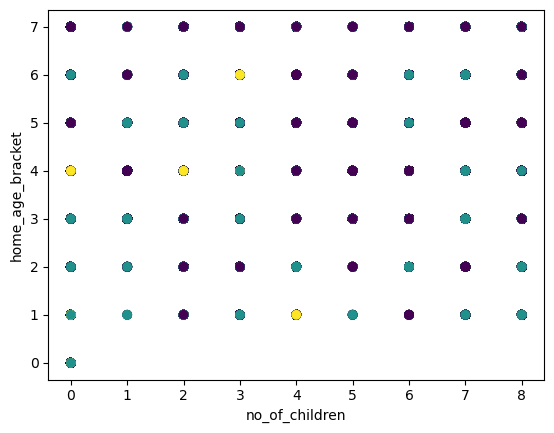

In [22]:
# Visualize the clusters
plt.scatter(df_imputed['no_of_children'], df_imputed['home_age_bracket'], c=labels)
plt.xlabel('no_of_children')
plt.ylabel('home_age_bracket')
plt.show()

In [23]:
from sklearn.decomposition import PCA
# Perform PCA
pca = PCA(n_components=2)
df_pca = pca.fit_transform(df_imputed)

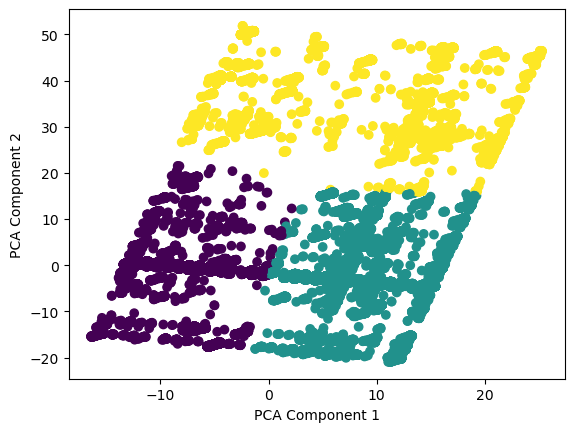

In [24]:
# Visualize the clusters
plt.scatter(df_pca[:, 0], df_pca[:, 1], c=labels)
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.show()

In [25]:
# Analyze the cluster centroids
centroids = kmeans.cluster_centers_
for i in range(len(centroids)):
    print('Cluster', i+1, 'centroid:')
    for j in range(len(df_imputed.columns)):
        print(df_imputed.columns[j], ':', centroids[i][j])
    print('\n')

Cluster 1 centroid:
no_of_children : 1.612940027463207
home_age_bracket : 4.4934212526748585
no_married_residents : 1.482137405694235
home_occupancy : 6.2330815270867195
owner_rental_info : 2.0502509751365947
length_of_residence : 5.001442483699086
dwell_type : 1.40370083423243
education_backgnd : 2.6204473888731386
ethnicity_code : 27.114259060848852
ethinicity_group_code : 1.9845352611845337
language_spoken : 15.154967264378719
county_size_code : 2.2505731622623664
family_composed_code : 8.730288387276333
maleadulthh : 0.5891530334118796
femaleadulthh : 0.6226342233514603
occupationcd : 3.6576193180909358
lgcycorp : 0.8171475553794915
prizmsocialgroupslvl1_desc : 6.989357121746604


Cluster 2 centroid:
no_of_children : 1.5099898869276194
home_age_bracket : 4.157946788070019
no_married_residents : 1.566515610354323
home_occupancy : 6.257075137545453
owner_rental_info : 2.4140106183775556
length_of_residence : 5.036739975390829
dwell_type : 1.4524500645241243
education_backgnd : 2.8306

In [27]:
import pandas as pd
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules


In [34]:

df = pd.get_dummies(df)



In [36]:
df.shape

(3241969, 224)

In [37]:

# Find frequent itemsets
frequent_itemsets = apriori(df, min_support=0.1, use_colnames=True)

# Generate association rules
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1)

# Print the rules
print(rules)

C:\Users\P3185033\AppData\Local\anaconda3\lib\site-packages\mlxtend\frequent_patterns\fpcommon.py:110: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


MemoryError: Unable to allocate 55.8 GiB for an array with shape (6163, 3, 3241969) and data type uint8

In [ ]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder

# Create an instance of LabelEncoder
encoder = LabelEncoder()

final_data[['home_age_bracket', 'no_married_residents', 'home_occupancy', 
               'owner_rental_info', 'length_of_residence', 'dwell_type', 'education_backgnd','ethnicity_code',
               'ethinicity_group_code', 'language_spoken','county_size_code', 'femaleadulthh','family_composed_code', 'occupationcd', 'prizmsocialgroupslvl1_cd']] = final_data[['home_age_bracket', 'no_married_residents', 'home_occupancy', 
               'owner_rental_info', 'length_of_residence', 'dwell_type', 'education_backgnd','ethnicity_code',
               'ethinicity_group_code', 'language_spoken','county_size_code', 'femaleadulthh','family_composed_code' ,'occupationcd', 'prizmsocialgroupslvl1_cd']].astype(str).apply(encoder.fit_transform)